In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
agaricus_lepiota = pd.read_csv("data/agaricus-lepiota.data")
agaricus_lepiota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
p      8123 non-null object
x      8123 non-null object
s      8123 non-null object
n      8123 non-null object
t      8123 non-null object
p.1    8123 non-null object
f      8123 non-null object
c      8123 non-null object
n.1    8123 non-null object
k      8123 non-null object
e      8123 non-null object
e.1    8123 non-null object
s.1    8123 non-null object
s.2    8123 non-null object
w      8123 non-null object
w.1    8123 non-null object
p.2    8123 non-null object
w.2    8123 non-null object
o      8123 non-null object
p.3    8123 non-null object
k.1    8123 non-null object
s.3    8123 non-null object
u      8123 non-null object
dtypes: object(23)
memory usage: 1.4+ MB


In [3]:
agaricus_lepiota.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [4]:
for col in agaricus_lepiota.columns:
    print(agaricus_lepiota[col].value_counts())

e    4208
p    3915
Name: p, dtype: int64
x    3655
f    3152
k     828
b     452
s      32
c       4
Name: x, dtype: int64
y    3244
s    2555
f    2320
g       4
Name: s, dtype: int64
n    2283
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: n, dtype: int64
f    4748
t    3375
Name: t, dtype: int64
n    3528
f    2160
s     576
y     576
l     400
a     400
p     255
c     192
m      36
Name: p.1, dtype: int64
f    7913
a     210
Name: f, dtype: int64
c    6811
w    1312
Name: c, dtype: int64
b    5612
n    2511
Name: n.1, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     407
e      96
y      86
o      64
r      24
Name: k, dtype: int64
t    4608
e    3515
Name: e, dtype: int64
b    3776
?    2480
e    1119
c     556
r     192
Name: e.1, dtype: int64
s    5175
k    2372
f     552
y      24
Name: s.1, dtype: int64
s    4935
k    2304
f     600
y     284
Name: s.2, dtype: int64
w    4463
p    1872
g 

In [5]:
agaricus_lepiota = agaricus_lepiota.replace('?',np.NaN)

In [6]:
for col in agaricus_lepiota:
    # Check if the column is of object type
    if agaricus_lepiota[col].dtypes == 'object':
        # Impute with the most frequent value
        agaricus_lepiota = agaricus_lepiota.fillna(agaricus_lepiota[col].value_counts().index[0])

In [7]:
agaricus_lepiota.rename(columns={'p':'classes','x':"cap-shape",'s':"Cap-surface",'n':"cap-color",
't':"bruises?",'p.1':"odor", 'f':"gill-attachment",'c':"gill-spacing",'n.1':"gill-size",'k':"gill-color",
'e':"stalk-shape", 'e.1':"stalk-root", 's.1':"stalk-surface-above-ring",'s.2':"stalk-surface-below-ring",
 'w':"stalk-color-above-ring", 'w.1':"stalk-color-below-ring",'p.2':"veil-type",'w.2':"veil-color",'o':"ring-number",'p.3':"ring-type",'k.1':"spore-print-color",'s.3':"population",'u':"habitat"}, inplace=True)

In [8]:
agaricus_lepiota.describe()

,classes,cap-shape,Cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [9]:
agaricus_lepiota.classes = agaricus_lepiota.classes.map({'e':1,'p':0})

In [10]:
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

In [11]:
X = pd.get_dummies(agaricus_lepiota.iloc[:,2:], drop_first=True)
y = agaricus_lepiota.classes
X_train, X_test, y_train, y_test= train_test_split(X, y,
test_size=0.2,
stratify=y,
random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [12]:
y_pred = dt.predict(X_test)

In [13]:
accuracy_score(y_pred,y_test)

0.9495384615384616

[Text(167.4, 181.2, 'X[17] <= 0.5\nentropy = 0.499\nsamples = 6498\nvalue = [3132, 3366]'),
 Text(83.7, 108.72, 'X[36] <= 0.5\nentropy = 0.287\nsamples = 3680\nvalue = [3042, 638]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.132\nsamples = 3245\nvalue = [3015, 230]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.116\nsamples = 435\nvalue = [27, 408]'),
 Text(251.10000000000002, 108.72, 'X[74] <= 0.5\nentropy = 0.062\nsamples = 2818\nvalue = [90, 2728]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.024\nsamples = 2761\nvalue = [33, 2728]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.0\nsamples = 57\nvalue = [57, 0]')]

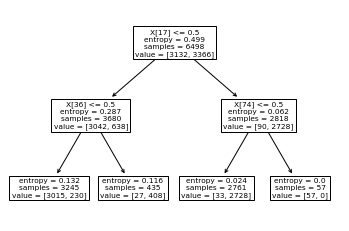

In [14]:
plot_tree(dt.fit(X_train, y_train)) 